In [1]:
import os
import numpy as np
import pickle
import copy

In [2]:
import matplotlib.pyplot as plt

In [3]:
from cil.io import NikonDataReader, RAWFileWriter, TIFFStackReader, TIFFWriter
from cil.utilities.jupyter import islicer
from cil.utilities.display import show_geometry, show2D
from cil.recon import FDK
from cil.plugins.tigre import FBP, ProjectionOperator
from cil.processors import TransmissionAbsorptionConverter, Slicer, CentreOfRotationCorrector
from cil.optimisation.algorithms import CGLS, SIRT
from cil.framework import ImageData, ImageGeometry, AcquisitionData, AcquisitionGeometry

In [4]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/raw_data_3DIM/')
# path = os.path.join(base_dir,'VKH8206-X20 [2022-02-08 10.27.26]/VKH8206-X20_recon.xtekct')
# path = os.path.join(base_dir,'VKH8206-X20 [2022-02-08 10.27.26]/VKH8206-X20.xtekct')
# path = os.path.join(base_dir,'VKH8206-X16 [2022-02-07 10.28.35]/VKH8206-X16_recon.xtekct')
# path = os.path.join(base_dir,'VKH8206-X10 [2022-02-10 10.55.25]/VKH8206-X10.xtekct')
path = os.path.join(base_dir,'VKH8206-X10 [2022-02-10 10.55.25]/VKH8206-X10_recon.xtekct')
# path = os.path.join(base_dir,'VKH8206-X12-X22 [2022-02-08 13.26.56]/VKH8206-X12-X22.xtekct')

reader = NikonDataReader(file_name=path)
data = reader.read()

(1571, 1000, 1000)
3D Cone-beam tomography
System configuration:
	Source position: [   0.        , -280.36486816,    0.        ]
	Rotation axis position: [0.24672229, 0.        , 0.        ]
	Rotation axis direction: [0.00196535, 0.        , 0.99999807]
	Detector position: [ -0.        , 831.38313184,   0.        ]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [1000 1000]
	Pixel size: [0.4 0.4]
	Pixel origin: top-right
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 1571
	Angles 0-20 in degrees:
[180.     , 179.77084, 179.54169, 179.31255, 179.08339, 178.85423,
 178.62508, 178.39592, 178.16678, 177.93762, 177.70847, 177.47931,
 177.25015, 177.02101, 176.79185, 176.5627 , 176.33354, 176.10439,
 175.87524, 175.64609]
Distances in units: units distance
Number of channels: 1
channel_spacing: 1.0
voxel_num : x1000,y1000,z1000
voxel_size : x0.10087353183061737,y0.10087353183061737,z

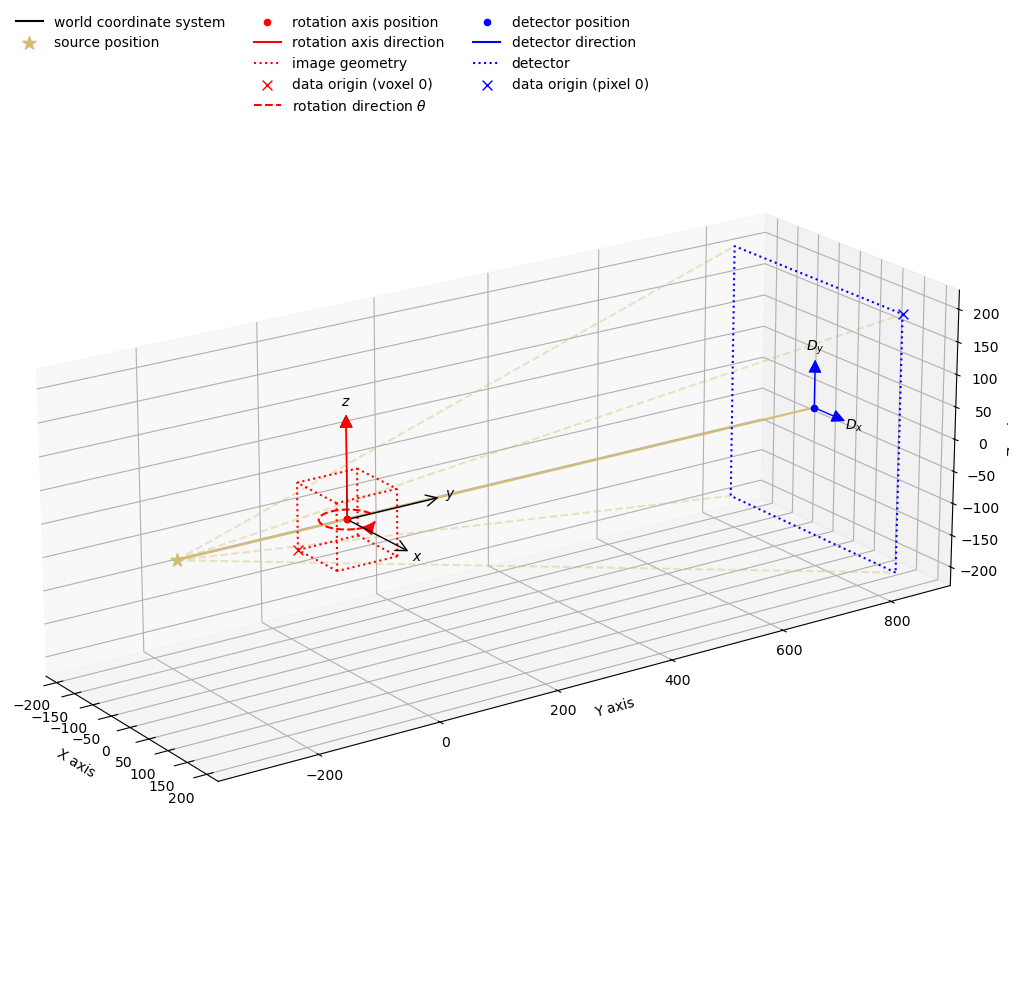

In [6]:
ag = data.geometry
ig = ag.get_ImageGeometry()
print(ag.shape)
print(ag)
print(ig)
show_geometry(ag, ig, grid=True)

In [7]:
path = os.path.join(base_dir,'VKH8206-X16 [2022-02-07 10.28.35]/VKH8206-X16_recon.xtekct')
reader = NikonDataReader(file_name=path)
data = reader.read()

(3142, 2000, 2000)
3D Cone-beam tomography
System configuration:
	Source position: [   0.        , -114.42489624,    0.        ]
	Rotation axis position: [0.05821242, 0.        , 0.        ]
	Rotation axis direction: [0.00176154, 0.        , 0.99999845]
	Detector position: [ -0.        , 997.32310376,   0.        ]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [2000 2000]
	Pixel size: [0.2 0.2]
	Pixel origin: top-right
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 3142
	Angles 0-20 in degrees:
[-95.      , -95.11456 , -95.229126, -95.34369 , -95.45822 , -95.572784,
 -95.68735 , -95.80191 , -95.91647 , -96.03104 , -96.1456  , -96.26013 ,
 -96.374695, -96.48926 , -96.60382 , -96.71838 , -96.83295 , -96.94751 ,
 -97.06207 , -97.176605]
Distances in units: units distance
Number of channels: 1
channel_spacing: 1.0
voxel_num : x2000,y2000,z2000
voxel_size : x0.02058468218341459,y0

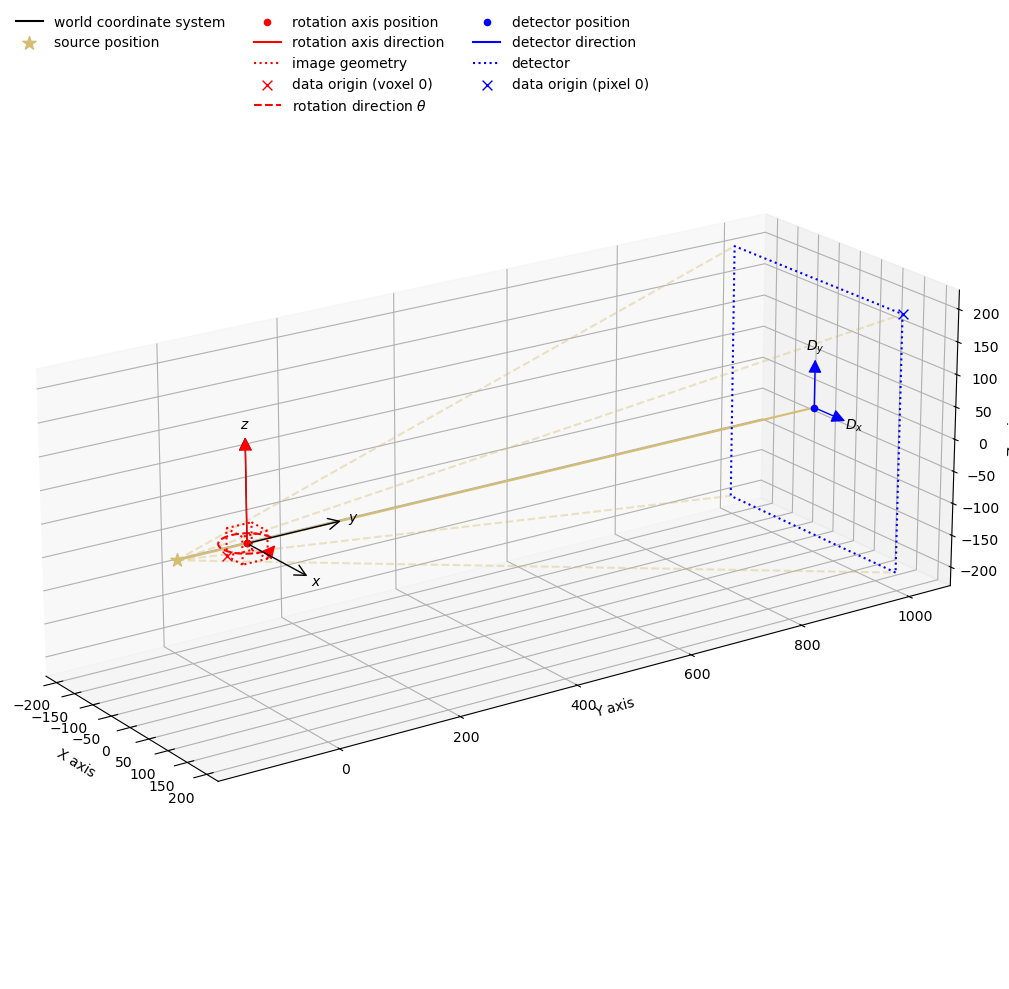

In [8]:
ag = data.geometry
ig = ag.get_ImageGeometry()
print(ag.shape)
print(ag)
print(ig)
show_geometry(ag, ig, grid=True)

In [3]:
114.42489624+997.32310376, 280.36486816+831.38313184, 255.77484131+855.97315869

(1111.748, 1111.748, 1111.748)

In [4]:
1000*0.100874

100.87400000000001

In [6]:
2*0.0205847, 2*0.0434798

(0.0411694, 0.0869596)